In [0]:
import torchvision

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
         

In [0]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import torch 
from torchvision import transforms as T 
from torchvision import models 
import sys 
import os 
from os.path import join 
import numpy as np 
import matplotlib.pylab as plt
import cv2
from PIL import Image 
import random 



In [0]:
root = '/content/drive/'
drive.mount(root)
mot = 'My Drive/Colab Notebooks/DeepLearning/'
MOT_PATH = join(root, mot)

img_data = join(MOT_PATH, 'train/MOT17-09/img1/')
sys.path.append(img_data)
txt_data_path = join(MOT_PATH, 'train/MOT17-09/gt')
f = open(txt_data_path+'/gt.txt', 'rb')
txt_data = [line for line in f.readlines()]


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
print(len(COCO_INSTANCE_CATEGORY_NAMES))

91


In [0]:
def sample_img(img_data):
    list_img_data = os.listdir(img_data)
    list_img_data.sort()
    img_sample_path = img_data + list_img_data[99]
    img_sample_origin = cv2.imread(img_sample_path)
    img_sample = cv2.cvtColor(img_sample_origin, cv2.COLOR_BGR2RGB)
    return img_sample_path

In [0]:
def get_prediction(img_path, threshold): 
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    # print(pred)
    # print(pred[0]['scores'])
    # print(pred[0]['scores'].detach().numpy())
    # score는 내림차순으로 정렬되어 있다. 
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    # print(pred_t)
    # pred_t = 17, score가 0.5이상인 box들의 갯수 
    masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
    # print(pred[0]["masks"])
    # print((pred[0]["masks"]).size())
    # print((pred[0]['masks']>0.5).size())
    # print(masks.shape)
    # print(pred[0]['masks']>0.5)
    # print((pred[0]['masks']>0.5).squeeze())
    # print((pred[0]['masks']>0.5).squeeze().detach())
    # print((pred[0]['masks']>0.5).squeeze().detach())
    # print(masks)
    # print(masks)
    # print(type(masks))
    # .cpu(): to move the tensor to cpu() to do some operationss. cuda tensors에서는 작동하지 않기도
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    # print(pred_class)
    # print(len(pred_class))
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    # print(list(pred[0]['boxes'].detach().numpy())[0]) : 첫 박스의 좌표값
    masks = masks[:pred_t+1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return masks, pred_boxes, pred_class, pred_score

In [0]:
# def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=1.5, text_th=3):
#     img, boxes, pred_cls = get_prediction(img_path, threshold)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, COLOR_BGR2RGB)
#     return img,  boxes, pred_cls

In [0]:
def random_colour_masks(image):
    colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    # r[image], g[image], b[image] = colours[random.randrange(0, 12)]
    # print(r.shape) = (1080, 1920)
    r[image == 1], g[image == 1], b[image == 1] = colours[random.randrange(0, 11)]
    # print(r.ndim) = 2
    # print(r.shape) = (1080, 1920)
    # mask 내에서 1인 부분에 한해 mask를 입힌다.
    # r, g, b = colours[random.randrange(0, 11)]
    # print(r)
    # print(r, g, b)
    coloured_mask = np.stack([r, g, b], axis = 2)
    # coloured_mask = cv2.GaussianBlur(coloured_mask, (5, 5), 5, 5)
    # print(coloured_mask.ndim) = 3
    # print(coloured_mask.shape) = (height, width, channel)
    return coloured_mask

In [0]:
def instance_segmentation_api(img_path, threshold=0.5, rect_th=3, text_size=1, text_th=2):
    masks, boxes, pred_cls, pred_score = get_prediction(img_path, threshold)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_blur = cv2.blur(img, (10, 10))
    # print(img.shape)
    print(img[3, 4])
    print(img[3][4])
    print(img[3, 4] & [110, 0, 1])
    print(img[3, 4] | [0, 0, 0])
    for i in range(len(masks)):
        if pred_cls[i] == 'person':
            if i != 0:
                rgb_mask = random_colour_masks(masks[i])
                # print(rgb_mask[50][50])          
                for k in range(rgb_mask.shape[0]):                    
                    for j in range(rgb_mask.shape[1]):
                    # numpy에서 boolean을 사용하기에는 any 또는 all의 문제가 있기 때문에, 밑에처럼 any나 all을 넣어서 = True, False 형태로 만들어줘야 한다. 
                        if any(rgb_mask[k, j]) == True:
                            img[k, j] = img_blur[k, j]
                img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
            else: 
                # cv2.rectangle(img, boxes[i][0], boxes[i][1], color = (0, 255, 0), thickness = rect_th)
                cv2.putText(img, "ME with score "+str(pred_score[i]), boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    plt.figure(figsize=(20, 30))
    plt.imshow(img)
    # plt.xticks([])
    # plt.yticks([])
    plt.show()


[109   0   0]
[109   0   0]
[108   0   0]
[109   0   0]


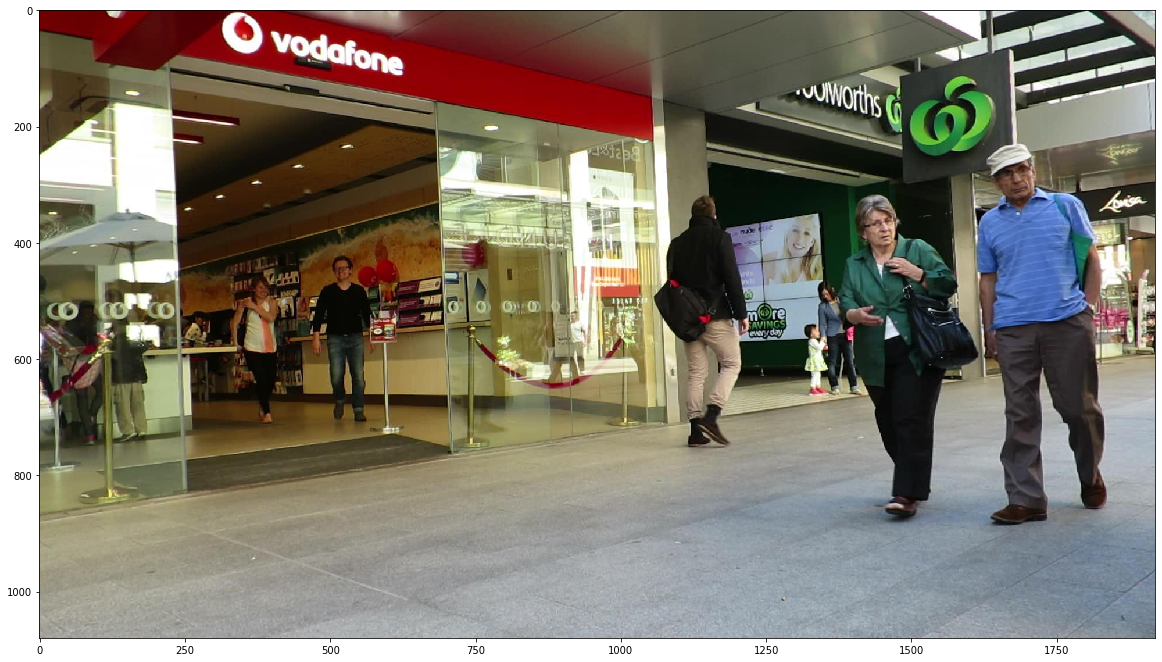

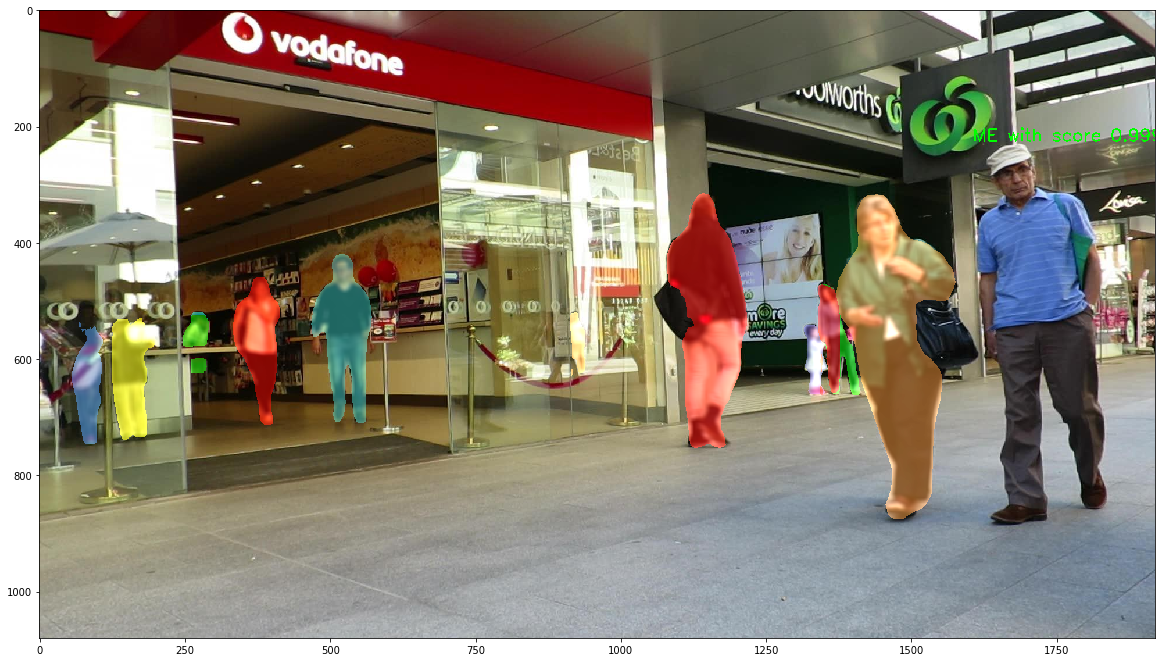

In [0]:
img_path = sample_img(img_data)
img = Image.open(img_path)
plt.figure(figsize=(20, 30))
plt.imshow(img)

instance_segmentation_api(img_path, 0.5, 3, 3)

In [0]:
# ToDo: 비디오 프레임 간 blur할 인스턴스 유지하기 

def Video(openpath, savepath = "output.avi"):
    cap = cv2.VideoCapture(openpath)
    if cap.isOpened():
        print("Video Opened")
    else: 
        print("Video Not Opened")
        print("Program Abort")
        exit()
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    fourcc = cap.get(cv2.CAP_PROP_FOURCC)
    out = cv2.VIDEOW
